<a href="https://colab.research.google.com/github/Ricardinho146/imersaocssalura/blob/master/Alura_Imers%C3%A3o_Dados_4_An%C3%A1lise_de_Pre%C3%A7o_de_Im%C3%B3veis_em_S%C3%A3o_Paulo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS DE IMÓVEIS DA CIDADE SÃO PAULO

<H3> Este Notebook foi elaborado durante o projeto de Imersão Dados ministrado pela Alura e oarceria com profissionais da Creditas.</h3>

**Etapas do projeto:**



*   Extração e elaboração de Dataframes utilizando a Biblioteca [Pandas](https://pandas.pydata.org/) aplicados a  dados reais de Preços de Imóveis, Dados de Localidades da Cidade de São Paulo e Dados Publicos do [IGBE](https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2010.html?=&t=destaques);
*   Analise Estatisticas Descritivas dos dados estraidos com a Biblioteca [Pandas](https://pandas.pydata.org/);
*   Visualização de Dados utilizando as Bibliotecas Matplotlib [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) e [Plotly](https://plotly.com/);
*   Treinar e aplicar um modelo de  Machine Learning com a Biblioteca [Scikit-Learnig](https://scikit-learn.org/stable/index.html) para a predição dos preços dos imóveis;



<figure>
<img src='https://www.alura.com.br/assets/img/imersoes/imersao-dados-3ed/share-img-dados.1651605524.png' />
</figure>

<h2>Instalando e Importando as Bibliotecas, para analise e visualizações de dados:</h2>


In [ ]:
# Instalando a Biblioteca Plotly

!pip install -U plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 7.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
import pandas as pd
import numpy as np
from numpy.ma.core import count
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("dark")
import plotly.express as px


# 1. Extraindo os dados com os preços de imóveis de São Paulo e montando um Dataframe.

In [ ]:
url_dados_imoveis = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'

dados_imoveis = pd.read_csv(url_dados_imoveis)

Verificando as 5 primeiras linhas do Dataframe

In [ ]:
dados_imoveis.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Verificando se há dados do meu bairro Campo Limpo:

Infelizmente não há dados do meu bairro ☹


In [ ]:
tem_campo_Limpo = dados_imoveis["Bairro"] == "Campo Limpo"
print(f'"Quantidade Total de Imóveis no Bairro do Campo Limpo: {tem_campo_Limpo.sum()}')

"Quantidade Total de Imóveis no Bairro do Campo Limpo: 0


Verificando se há dados do Bairro da Vila Mariana onde se localiza a Alura.



In [ ]:
tem_vila_mariana = dados_imoveis["Bairro"]== "Vila Mariana"
#verificando quantos dados estão na vila Mariana (como os dados são True = 1 ou False =0), ao somar os valores o resultado será a contagem

print(f'"Numero Total de Imóveis na Vila Mariana ="  {tem_vila_mariana.sum()}')

"Numero Total de Imóveis na Vila Mariana ="  184


Comparando as Médias de Metragem Quadrada dos Imóveis da Vila Mariana em relação a média global dos imóveis do Dataframe.

In [ ]:
dados_vila_m = dados_imoveis[tem_vila_mariana]

print("Métragem Média dos Imóveis na Vila Mariana: {:.2f} m²".format(dados_vila_m["Metragem"].mean()))
print("Métragem Mediana dos Imóveis na Vila Mariana:{:.2f} m²".format(dados_vila_m["Metragem"].median()))

# Comparando com a Média Geral do Dataframe

print("Métragem Média dos Iméveis do Dataframe: {:.2f} m²".format(dados_imoveis["Metragem"].mean()))
print("Métragem Mediana dos Iméveis do Dataframe: {:.2f} m²".format(dados_imoveis["Metragem"].median()))

Métragem Média dos Imóveis na Vila Mariana: 233.62 m²
Métragem Mediana dos Imóveis na Vila Mariana:235.50 m²
Métragem Média dos Iméveis do Dataframe: 442.30 m²
Métragem Mediana dos Iméveis do Dataframe: 290.00 m²


Verificando a distribuição de quantidade de imóveis por bairro:

*Os 5 bairros com as maiores concentrações de imóveis são (**Alto de Pinheiros, Jardim Guedala, Jardim Paulista, Brooklin Paulista e Jardim Europa**)*


In [ ]:
dados_imoveis["Bairro"].value_counts()


Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

Verificando  a configuração e tipos de dados contidos no Dataframe

In [ ]:
# Analisando as caracteristicas do dados
dados_imoveis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
# Note que os dados da coluna Valor estão formatados como "object" ou seja uma string
dados_imoveis["Valor"][0]

'R$ 7.000.000'

Analisando uma amostragem com 10 dados aleatórios do Dataframe

In [ ]:
# Note que a coluna "Valor", além de conter a string "R$" também tem "\n/mês"
dados_imoveis.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4617,Rua Safira,Aclimação,São Paulo,225,3,4,2,R$ 1.600.000
1350,NaN,Jardim Guedala,São Paulo,895,5,7,10,R$ 4.700.000
4034,Rua República do Iraque,Brooklin Paulista,São Paulo,282,5,5,4,R$ 1.800.000
4230,Rua Euclides de Andrade,Jardim Vera Cruz,São Paulo,80,2,2,2,R$ 1.100.000
6114,"Rua Atlântica, 50",Jardim América,São Paulo,420,4,8,10,R$ 9.900.000
1777,Rua Cônego Eugênio Leite,Cerqueira César,São Paulo,285,3,2,1,R$ 2.500.000
6667,NaN,Campo Belo,São Paulo,210,4,4,2,R$ 1.190.000
9007,Rua Baltazar Pinto,Vila Matilde,São Paulo,130,3,2,2,R$ 405.000
5798,Rua Polônia,Jardim Europa,São Paulo,491,3,4,2,R$ 3.200.000
7630,"Rua Alemanha, 50",Jardim Europa,São Paulo,550,3,4,4,R$ 7.700.000


<h2> Tratando os dados da coluna "Valor" para converter do formato 'string' para 'float'.

Elaborando um Dataframe separando as strings  da coluna "Valor"

In [ ]:
string_Valor =dados_imoveis["Valor"].str.split(expand = True)
string_Valor

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Checando os dados das colunas 0, 1 e 2 para saber quais são as strings unicas contidas:

In [ ]:
print(string_Valor[0].unique())
print(string_Valor[1].unique())
print(string_Valor[2].unique())

['R$']
['7.000.000' '3.700.000' '380.000' ... '553.000' '951.000' '2.200']
[None '/Mês' '/Ano' '/Dia']


Contando os valores unicos em cada coluna

In [ ]:
print(len(string_Valor[0].unique()))
print(len(string_Valor[1].unique()))
print(len(string_Valor[2].unique()))


1
1038
4


Incluindo os dados das colunas de strings no dataframe

In [ ]:
dados_imoveis[["Moeda", "Valor_","Tipo Anuncio"]]= string_Valor
dados_imoveis.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_,Tipo Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


Filtrando o dataframe mantendo apenas os dados referente a vendas

In [ ]:
dados_imoveis[dados_imoveis["Tipo Anuncio"].isnull()]["Tipo Anuncio"].unique()

array([None], dtype=object)

In [ ]:
dados_imoveis_vendas = dados_imoveis[dados_imoveis["Tipo Anuncio"].isnull()]

In [ ]:
dados_imoveis_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rua           6107 non-null   object
 1   Bairro        9146 non-null   object
 2   Cidade        9156 non-null   object
 3   Metragem      9156 non-null   int64 
 4   Quartos       9156 non-null   int64 
 5   Banheiros     9156 non-null   int64 
 6   Vagas         9156 non-null   int64 
 7   Valor         9156 non-null   object
 8   Moeda         9156 non-null   object
 9   Valor_        9156 non-null   object
 10  Tipo Anuncio  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [ ]:
dados_imoveis_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_,Tipo Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


Convertendo os valores de string para tipo numérico removendo o "." e convertento o valor para o formato float.

In [ ]:
dados_imoveis_vendas['Valor_'].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_, Length: 9156, dtype: float64

In [ ]:
dados_imoveis_vendas['Valor_convert'] = dados_imoveis_vendas['Valor_'].str.replace(".", "").astype(float)
dados_imoveis_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_,Tipo Anuncio,Valor_convert
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0


Convertendo os valores dos preços dos imóveis da coluna 'Valor_convert' para decimais divindo o valor por 1 Milhão, assim facilitará a leitura dos dados

In [ ]:
dados_imoveis_vendas['Valor_Milhoes'] = dados_imoveis_vendas['Valor_convert']/1000000
dados_imoveis_vendas.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_,Tipo Anuncio,Valor_convert,Valor_Milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,0.540


Checando novamente os dados do dataframe e tipo do dado de cada coluna

In [ ]:
dados_imoveis_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   object 
 8   Moeda          9156 non-null   object 
 9   Valor_         9156 non-null   object 
 10  Tipo Anuncio   0 non-null      object 
 11  Valor_convert  9156 non-null   float64
 12  Valor_Milhoes  9156 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1001.4+ KB


Inserindo uma coluna do preço do m² dos imóveis

In [ ]:
dados_imoveis_vendas['Valor_m2'] = (dados_imoveis_vendas['Valor_convert']/dados_imoveis_vendas['Metragem'])/1000
# Valor do métro quadrado foi divido por 1.000 para deixa o valor em  uma unidade de milhares de R$ e facilitar a leitura dos dados
pd.set_option('display.precision', 2)
dados_imoveis_vendas.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_,Tipo Anuncio,Valor_convert,Valor_Milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7.00e+06,7.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3.70e+06,3.70,7.46
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,3.80e+05,0.38,3.04
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,6.85e+05,0.69,2.21
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,5.40e+05,0.54,5.40


Selecionando somente os dados 'relevantes' para as análises em um novo Data Frame:

In [ ]:
dados_imoveis_vendas = dados_imoveis_vendas[['Rua',	'Bairro',	'Cidade',	'Metragem',
                                             'Quartos',	'Banheiros','Vagas','Moeda','Valor_Milhoes','Valor_m2']]
dados_imoveis_vendas.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor_Milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3.70,7.46
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,0.38,3.04
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,0.69,2.21
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,0.54,5.40


Veriricando os valores minimo e máximo dos preços dos imóveis:

In [ ]:
print(f"Menor Preço = R$ {dados_imoveis_vendas['Valor_Milhoes'].min()} Milhões")
print(f"Maior Preço = R$ {dados_imoveis_vendas['Valor_Milhoes'].max()} Milhoes")

Menor Preço = R$ 0.013 Milhões
Maior Preço = R$ 65.0 Milhoes


<h2>Plotando a ditribuição dos Valores dos Imóveis em um Boxplot:</h2>

Note que a maior concentração dos valores dos iméveis estão de 0,13 a 10,00 milhões de Reais.

In [ ]:
px.box(data_frame= dados_imoveis_vendas,x=dados_imoveis_vendas['Valor_Milhoes'],title = "BOXPLOT PREÇOS DOS IMÓVEIS", points = 'all')

Realizando uma breve análise estatistica descritiva com os dados numéricos do Dataframe:

In [ ]:
dados_imoveis_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_Milhoes,Valor_m2
count,9156.00,9156.00,9156.00,9156.00,9156.00,9.16e+03
mean,434.42,3.45,3.80,3.96,3.05,8.00e+00
std,7856.42,1.05,1.97,2.60,3.94,5.29e+00
min,10.00,1.00,1.00,1.00,0.01,9.33e-03
25%,168.00,3.00,2.00,2.00,0.89,4.75e+00
50%,276.00,3.00,4.00,4.00,1.80,6.50e+00
75%,450.00,4.00,5.00,5.00,3.50,9.45e+00
max,750000.00,16.00,40.00,50.00,65.00,8.00e+01


Realizando uma breve análise estatistica descritiva com os dados categórico do Dataframe:

In [ ]:
 dados_imoveis_vendas[["Rua", "Bairro", "Cidade"]].describe(include ="all")

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


Armazenando os top 10 bairros com maior concentração de imóveis em uma Variável:

In [ ]:
top_bairros = dados_imoveis_vendas["Bairro"].value_counts()[:10].index
top_bairros

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

<h2>Plotando em uma matrix 4 com Gráficos com as analises:</h2>



*    Gráfico de Barras com a Quantidade de Imóveis / Bairro;
*    Boxplot dom a distribuição dos Valores dos Imóveis;
*    Boxplot com a distribuição da Metragem dos Imóveis;
*    Boxplot com a distribuição do preço dos imóveis / m²).

*Todas análises são aplicadas ao Top 10 bairros utilizando **Matplotlib** e **Seaborn**.*


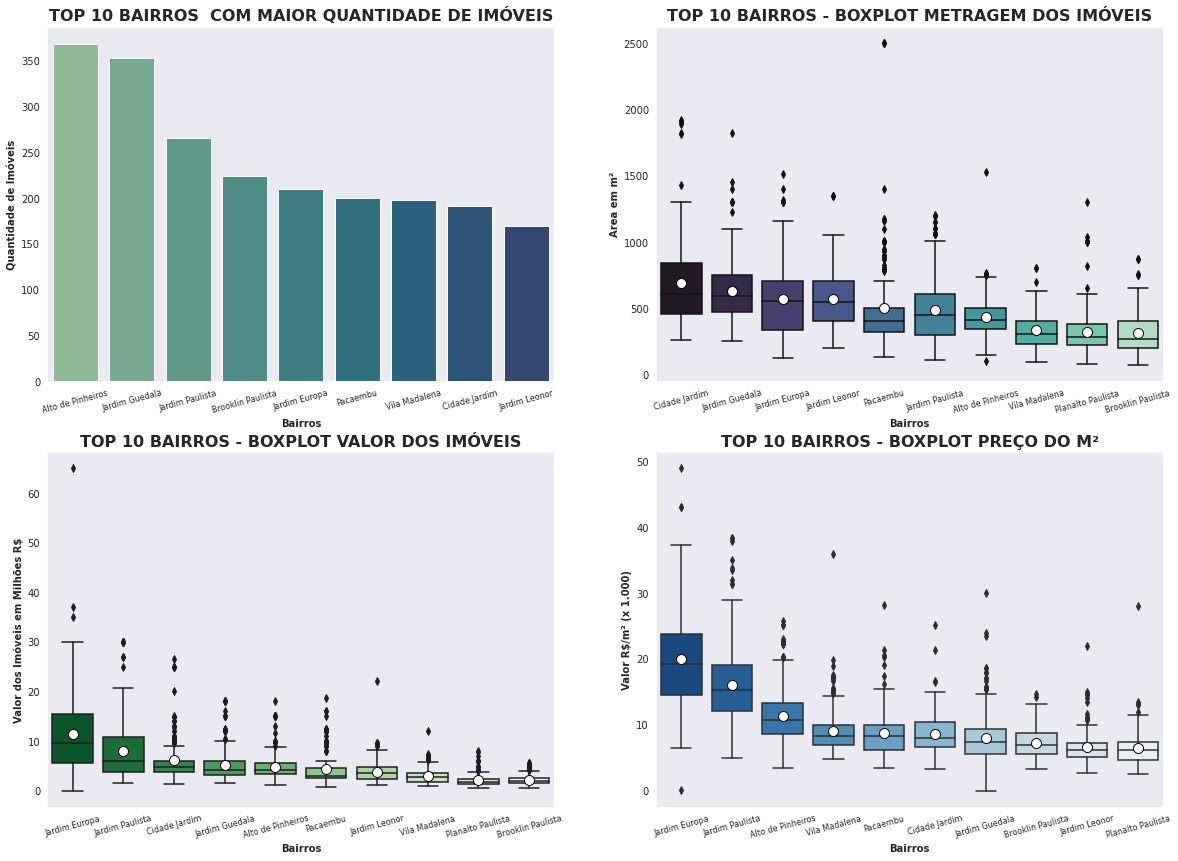

In [ ]:
fig = plt.figure(figsize=(20, 30))

# Plotando um gráfico de barras do Top 10 Bairros com maior numero de imóveis

ax1 = plt.subplot(4, 2, 1)
ax1 =sns.countplot(x="Bairro",  data= dados_imoveis_vendas, 
        order=['Alto de Pinheiros','Jardim Guedala', 'Jardim Paulista','Brooklin Paulista','Jardim Europa','Pacaembu', 'Vila Madalena','Cidade Jardim',
               'Jardim Leonor'], palette = 'crest')

ax1 = plt.title("TOP 10 BAIRROS  COM MAIOR QUANTIDADE DE IMÓVEIS", fontsize = 16, fontweight = 'bold')
ax1 = plt.xlabel('Bairros', fontsize = 10, fontweight = 'semibold')
ax1 = plt.ylabel('Quantidade de Imóveis', fontsize = 10, fontweight = 'semibold')
ax1 = plt.xticks(rotation = 15, fontsize = 8)


# Plotando um boxplot com a Metragem dos imóveis dos Top 10 Bairros
ax2 = plt.subplot(4, 2, 2)
ax2 =sns.boxplot(data = dados_imoveis_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x = "Bairro", y = "Metragem",palette = "mako",
        order=['Cidade Jardim','Jardim Guedala','Jardim Europa', 'Jardim Leonor','Pacaembu','Jardim Paulista','Alto de Pinheiros', 'Vila Madalena',
               'Planalto Paulista','Brooklin Paulista'], showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
                );

ax2 = plt.title("TOP 10 BAIRROS - BOXPLOT METRAGEM DOS IMÓVEIS", fontsize = 16, fontweight = 'bold')
ax2 = plt.xlabel('Bairros', fontsize = 10, fontweight = 'semibold')
ax2 = plt.ylabel('Area em m²', fontsize = 10, fontweight = 'semibold')
ax2 = plt.xticks(rotation = 15, fontsize = 8)

# Plotando um boxplot com os Valores dos Imóveis do Top 10 Bairros
ax3 = plt.subplot(4, 2, 3)
ax3 =sns.boxplot(data = dados_imoveis_vendas.query("Bairro in @top_bairros"), x = "Bairro", y = "Valor_Milhoes",palette = 'Greens_r',
        order=['Jardim Europa', 'Jardim Paulista', 'Cidade Jardim','Jardim Guedala','Alto de Pinheiros', 'Pacaembu','Jardim Leonor', 'Vila Madalena',
               'Planalto Paulista','Brooklin Paulista'], showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
                );

ax3 = plt.title("TOP 10 BAIRROS - BOXPLOT VALOR DOS IMÓVEIS", fontsize = 16, fontweight = 'bold')
ax3 = plt.xlabel('Bairros', fontsize = 10, fontweight = 'semibold')
ax3 = plt.ylabel('Valor dos Imóveis em Milhões R$', fontsize = 10, fontweight = 'semibold')
ax3 = plt.xticks(rotation = 15, fontsize = 8)

# Plotando um boxplot com os Valores dos Imóveis do Top 10 Bairros
ax4 = plt.subplot(4, 2, 4)
ax4 =sns.boxplot(data = dados_imoveis_vendas.query("Bairro in @top_bairros"), x = "Bairro", y = "Valor_m2",palette = 'Blues_r',
        order=['Jardim Europa', 'Jardim Paulista', 'Alto de Pinheiros', 'Vila Madalena','Pacaembu', 'Cidade Jardim','Jardim Guedala','Brooklin Paulista',
               'Jardim Leonor','Planalto Paulista'], showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}
                );

ax4 = plt.title("TOP 10 BAIRROS - BOXPLOT PREÇO DO M²", fontsize = 16, fontweight = 'bold')
ax4 = plt.xlabel('Bairros', fontsize = 10, fontweight = 'semibold')
ax4 = plt.ylabel('Valor R$/m² (x 1.000)', fontsize = 10, fontweight = 'semibold')
ax4 = plt.xticks(rotation = 15, fontsize = 8)


plt.show()

# 2. Montando Dataframes com dados reais de Endereços e Dados Sociais do IBGE com as Geo Localizações (Latidute e Longetude). 

In [ ]:
url_ibge = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
ibge_sp = pd.read_csv(url_ibge, encoding='ISO-8859-1', sep = ';', thousands='.', decimal=',')

ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.32,2091.32,8.53e+06,2164.55,8.67e+06,1227.41,4.29e+06,1713.75,5.15e+06,NaN
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.09,1650.09,3.98e+06,1717.44,4.03e+06,1045.78,2.57e+06,1468.08,2.99e+06,NaN
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.08,1280.43,5.47e+06,2349.53,7.55e+06,902.97,2.74e+06,1786.79,3.84e+06,NaN
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.26,1119.59,3.57e+06,1859.13,4.57e+06,869.09,2.12e+06,1567.41,2.74e+06,NaN
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.35,1416.90,2.24e+06,1581.66,2.24e+06,917.71,1.57e+06,1356.35,1.73e+06,NaN


Removendo os dados nulos "NAN" ou not a number

In [ ]:
ibge_sp.dropna(how= 'all', axis=1, inplace=True)
ibge_sp.head(5)

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8.53e+06,2164.55,8.67e+06,1227.41,4.29e+06,1713.75,5.15e+06
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3.98e+06,1717.44,4.03e+06,1045.78,2.57e+06,1468.08,2.99e+06
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5.47e+06,2349.53,7.55e+06,902.97,2.74e+06,1786.79,3.84e+06
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3.57e+06,1859.13,4.57e+06,869.09,2.12e+06,1567.41,2.74e+06
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2.24e+06,1581.66,2.24e+06,917.71,1.57e+06,1356.35,1.73e+06


Verficando os tipos dos dados de cada coluna do Dataframe

In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

Elaborando um Dataframe com os dados de endereços da cidade de São Paulo.

In [ ]:
dados_endereço = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Imersão Dados 4/enderecos.csv')
dados_endereço.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,9.76e+07,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,1.61e+07,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,9.76e+07,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,9.76e+07,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,9.76e+07,-30.86,-55.55


Filtrando o Dataframe mantendo apenas os dados São Paulo.

In [ ]:
endereco_sp = dados_endereço.query("sigla_uf	== 'SP'")
endereco_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,1.61e+07,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,1.35e+07,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,1.35e+07,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,1.35e+07,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,1.35e+07,-22.74,-47.35


Inserindo uma nova coluna com o nome da rua concatenando os dados com o tipo de logradouro + Nome do Logradouro, em seguida convertendo para letras minusculas.
 

In [ ]:
endereco_sp["rua"] = endereco_sp["tipo_logr"] + " " + endereco_sp["logr_nome"]
endereco_sp["rua"] = endereco_sp["rua"].str.lower().str.strip()
endereco_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,1.61e+07,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,1.35e+07,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,1.35e+07,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,1.35e+07,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,1.35e+07,-22.74,-47.35,rua joão bandini


Testando a função para manter apenas os nomes das ruas na coluna 'Rua' e checando apenas os 10 primeiros resultados no Dataframe 'dados_imóveis_vendas'.

In [ ]:
dados_imoveis_vendas['Rua'].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


Armazenando os dados dos endereços limpos em uma nova coluna chamada 'apenas ruas' no Dataframe 'dados_imoveis_vendas'.

In [ ]:
dados_imoveis_vendas["apenas ruas"] = dados_imoveis_vendas['Rua'].str.extract(r'(^[\w ]+)')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Convertendo os dados da coluna 'apenas ruas' para o letras minusculas.

In [ ]:
dados_imoveis_vendas['apenas ruas'] = dados_imoveis_vendas['apenas ruas'].str.lower().str.strip()
dados_imoveis_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valor_Milhoes,Valor_m2,apenas ruas
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7.00,7.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3.70,7.46,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,0.38,3.04,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,0.69,2.21,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,0.54,5.40,rua tobias barreto


Carregando os dados para um novo Dataframe onde a equipe da Alura realizou as açoes de join para juntar os dados de Vendas + Endereço + Dados IBGE.

In [ ]:
dados_geo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Imersão Dados 4/dados_geo.csv')
dados_geo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7.00e+06,NaN,7.00,7000.00,Avenida Itacira,4.06e+06,-23.62,-46.65,POINT (-46.6481622 -23.6157934),3.55e+14
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3.70e+06,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4.64e+06,-23.64,-46.69,POINT (-46.6883114 -23.6409612),3.55e+14
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,3.80e+05,NaN,0.38,3040.00,Rua Alba Valdez,4.85e+06,-23.75,-46.70,POINT (-46.6958895 -23.75299),3.55e+14
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,5.40e+05,NaN,0.54,5400.00,Rua Tobias Barreto,3.18e+06,-23.55,-46.59,POINT (-46.5881729 -23.5499597),3.55e+14
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1.98e+06,NaN,1.98,4500.00,Rua Graham Bell,4.74e+06,-23.59,-46.76,POINT (-46.7600773 -23.5937964),3.55e+14


<h2>Importando bilblioteca para plotagem dos pontos nos espaços geométricos para trabalhar a plotagem dos pontos de Geo Localizações.</h2>

Importando o método Point da biblioteca shapely.geometry para plotar um ponto utilizando uma Latidute de Longitude. 

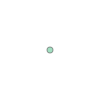

In [ ]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

Importando o método Polygon da biblioteca shapely.geometry para a imagem de um quadrado de dimensões 1x1 com as cooredadas abaixo.

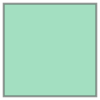

In [ ]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

Verificando se dentro do quadrado 1x1 tem um ponto de coordenadas (0.1 , 0.9).

In [ ]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).contains(Point(0.1,0.9))

True

<h2> Instalando a Biblioteca geopandas para consultar bairros com base nas suas respectivas latitudes e longitudes.</h2>

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 268 kB/s 
     |████████████████████████████████| 6.3 MB 13.0 MB/s 


Importando a biblioteca geopandas para a elaboração de dataframe com os dados de geo localização.

In [ ]:
import geopandas as gpd

Elaborando um dataframa com os dados de geo localização do censo do IBGE.

In [ ]:
setor_censo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Imersão Dados 4/35SEE250GC_SIR.shp')
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


Filtrando o Dataframe mantendo apenas dados de São Paulo e realizando um teste consultando o bairro do Campo Limpo (bairro em que se localiza a minha residência).

In [ ]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
#Realizando o teste com uma coordenada (Latitude e Longitude) do Bairro do Campo Limpo
setor_censo_sp[setor_censo_sp.contains(Point(-46.764069202996914, -23.641982256281036))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
45507,111089.0,355030817000034,URBANO,35503081700,None,355030817,CAMPO LIMPO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,45508,"POLYGON ((-46.76274 -23.64219, -46.76281 -23.6..."


<h2>Carregando um novo dataframe com o dados do c
enso IBGE de São Paulo.</h2>


In [ ]:
ibge_sp = pd.read_csv(
    'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
    encoding='ISO-8859-1',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8.53e+06,2164.55,8.67e+06,1227.41,4.29e+06,1713.75,5.15e+06
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3.98e+06,1717.44,4.03e+06,1045.78,2.57e+06,1468.08,2.99e+06
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5.47e+06,2349.53,7.55e+06,902.97,2.74e+06,1786.79,3.84e+06
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3.57e+06,1859.13,4.57e+06,869.09,2.12e+06,1567.41,2.74e+06
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2.24e+06,1581.66,2.24e+06,917.71,1.57e+06,1356.35,1.73e+06


<h2> Unindo os dados dos Dataframes 'dados_geo' + 'ibge_sp' em um novo dataframe utilizando o método do Pandas Merge com as chaves das colunas  para "setor_censo" e "cod_setor".</h2> 

In [ ]:
dados_vendas_censo  = pd.merge(left=dados_geo, right= ibge_sp, how= "left", left_on= "setor_censo", right_on= "Cod_setor")
dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7.00e+06,NaN,...,2.66,2.04,3158.96,2.22e+07,5570.65,2.58e+07,2096.19,1.30e+07,3930.35,1.72e+07
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3.70e+06,NaN,...,3.13,1.96,7600.44,3.68e+07,7890.53,3.59e+07,4149.00,2.68e+07,6063.92,2.75e+07
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,3.80e+05,NaN,...,3.47,3.06,805.13,7.69e+05,1011.75,7.57e+05,518.77,4.27e+05,858.51,4.14e+05
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,5.40e+05,NaN,...,3.00,1.99,2338.05,7.83e+06,2447.89,7.93e+06,1543.29,4.65e+06,1909.04,5.05e+06
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1.98e+06,NaN,...,3.51,2.31,1026.36,2.72e+05,1143.96,1.68e+05,735.67,3.67e+05,1086.94,1.60e+05


Checando os tipos dos dados das colunas do novo dataframe.

In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

<h2> Plotando uma word cloud com os nomes dos bairros da Cidade de São Paulo.</h2>

Convertendo a lista de bairros em uma string.

In [ ]:
bairros_lista = list(dados_vendas_censo['Bairro'])
bairros_lista =  map(str, bairros_lista)
bairros_lista = " ".join(bairros_lista)

print("Quantidade de plavras {}".format(len(bairros_lista)))

Quantidade de plavras 81564


Importando as Bibliotecas "PIL" e "wordcloud".

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

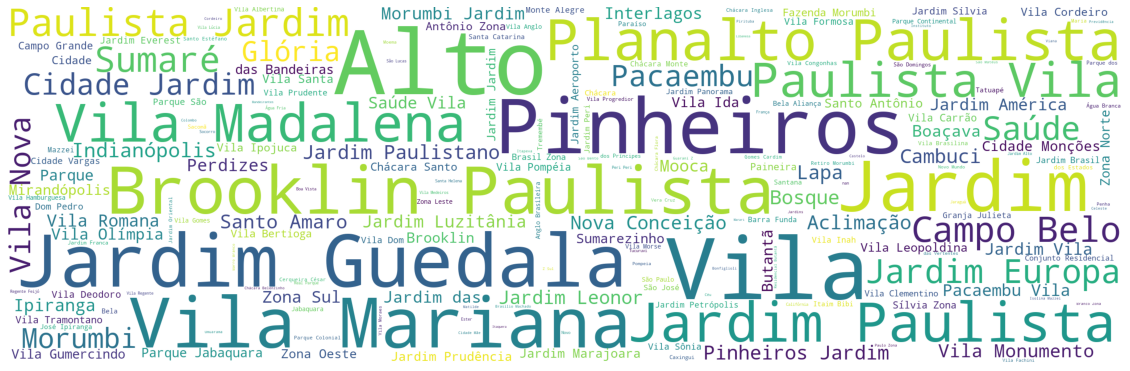

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# Definindo a wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",width=2500, height=800, max_font_size=200,
                      min_font_size=1).generate(bairros_lista)
#
# plotando a imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

<h2> Plotando os valores dos imóveis no em Mapa de Calor na Cidade de São Paulo.</h2>

Renderizando o Mapa de São Paulo, utilizando a latitude e longitude [ Latitude: -23.5489, Longitude: -46.6388].


Importando a Bilioteca plotly.graph_objects para plotar o gráfico:

In [ ]:
import plotly.graph_objects as go

In [ ]:
mapbox_token = "/content/drive/MyDrive/Colab Notebooks/Imersão Dados 4/mapbox_token.csv" 

In [ ]:
px.set_mapbox_access_token(open(mapbox_token).read())

In [ ]:
fig = px.scatter_mapbox(dados_vendas_censo, lat = 'latitude', lon = 'longitude', color ='Valor_anuncio', size = 'Metragem',
                        color_continuous_scale =  px.colors.cyclical.IceFire, size_max = 60, zoom = 10,
                        opacity = 0.3, title = "PREÇOS DE IMÓVEIS ESTADO DE SÃO PAULO",hover_name= "Rua",
                        hover_data=["Valor", "Bairro", "Metragem", "Quartos", "Vagas"])

fig.update_coloraxes(colorscale = [[0.02, 'rgb(166, 286, 227, 0.5)'],
                                   [0.07, 'rgb(31, 120, 180, 0.5)'],
                                   [0.10, 'rgb(178, 223, 138, 0.5)'],
                                   [0.15, 'rgb(51, 160, 44, 0.5)'],
                                   [0.25, 'rgb(251, 154, 153, 0.5)'],
                                   [0.50, 'rgb(227, 26, 28, 0.5)']
                                   
                                   ],)

fig.update_layout(height = 800, mapbox = dict(center = go.layout.mapbox.Center(lat = -23.5489 , lon =-46.6388 )), template = "plotly_dark")
fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

# 3. Analises de correlações e Treinando Modelos de Machine Leaning para predições de preços de imóveis.


Mantendo Dataframe 'dados_vendas_censo', apenas os dados relevantes para as análises de correlação.

In [ ]:
# parametrizando os valores para numéricos para o tipo float com 2 casas após a virgula
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

# Selecionando os dados do data frame  e removendo os valores nulos

dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()

dados_vendas_censo.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


<h2> Plotando uma matrix de correlaçã.</h2>

Devemos sempre atentar aos resultados de correlação pois nem sempre uma correlação forte indica que há uma relação de causa e efeito, como podemos ver nos exemplos acessando os links abaixo:
 

*   [Exemplos de fortes correlações sem causalidade](https://www.tylervigen.com/spurious-correlations)
*   [Artigo sobre Correlações vs Causualidade](https://vidadeproduto.com.br/correlacao-vs-causalidade/)




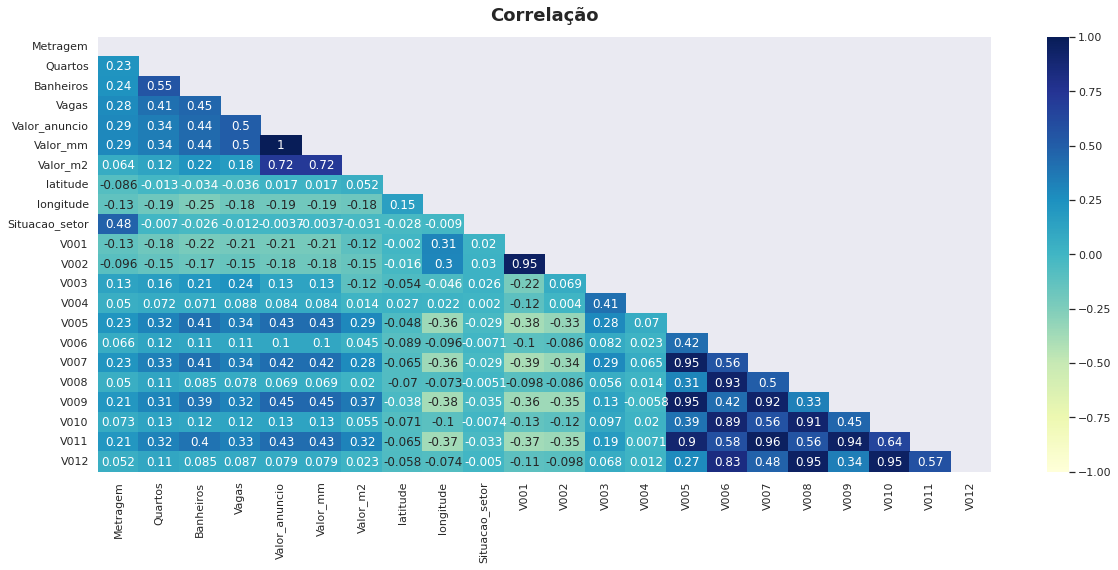

In [ ]:
plt.figure(figsize=(20, 8))

mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlação', fontdict={'fontsize':18, 'fontweight': 'bold'}, pad= 16);

<h2> Importando Bibliteca de Machine Learning <strong>Scikit-Learn</strong> e aplicando os métodos:</h2>

*    <i>LinearRegression:</i> Regressão Linear;
*    <i>train_test_split</i>: Mpetodo que separa um aporcentagem dos dados para Treino e Teste.


<h2>Teste 1. Testando o modelo de regressão linear utilizando os dados de "Metragem" para predizer o valor do imóvel "Valor_anuncio".</h2>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_1 = dados_vendas_censo[["Metragem"]]
Y_1 = dados_vendas_censo["Valor_anuncio"]
# Separando dados de Treino e Teste, utilizando uma amostragem de 33.33% dos dados para test e 66.66% para treino.
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_1, Y_1, test_size = 0.25, random_state = 42)
modelo1 = LinearRegression()

Verificando a quantidade de linhas e colunas separadas para dados de Treino e Test.

In [ ]:
print('Dados de Treino: ', X_train1.shape, Y_train1.shape)
print('Dados de Teste: ', X_test1.shape, Y_test1.shape)

Dados de Treino:  (3981, 1) (3981,)
Dados de Teste:  (1327, 1) (1327,)


Executando o fit (ajustes) das variáveis X_train e Y_train.

In [ ]:
modelo1.fit(X_train1, Y_train1)

LinearRegression()

Executando o método predict_test, para predizer Y_test  com os dados da variável X_test.

In [ ]:
Y_predict1 = modelo1.predict(X_test1)

<h2>Carregando as métricas para avaliar os modelocos com  os métodos "mean_absolute_erro" (erro médio absoluto) e "mean_absolute_percentage_error" (erro médio absoluto em porcentagem).</h2>

In [ ]:
from sklearn import metrics

mae1  = metrics.mean_absolute_error(Y_test1, Y_predict1)
mape1 = metrics.mean_absolute_percentage_error(Y_test1, Y_predict1)

# Realizando o pint com as métricas

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae1/1000000, mape1*100))


Erro médio entre Y Teste e Y Predito de Teste: R$ 1.844 Milhões ou 134.98 % 


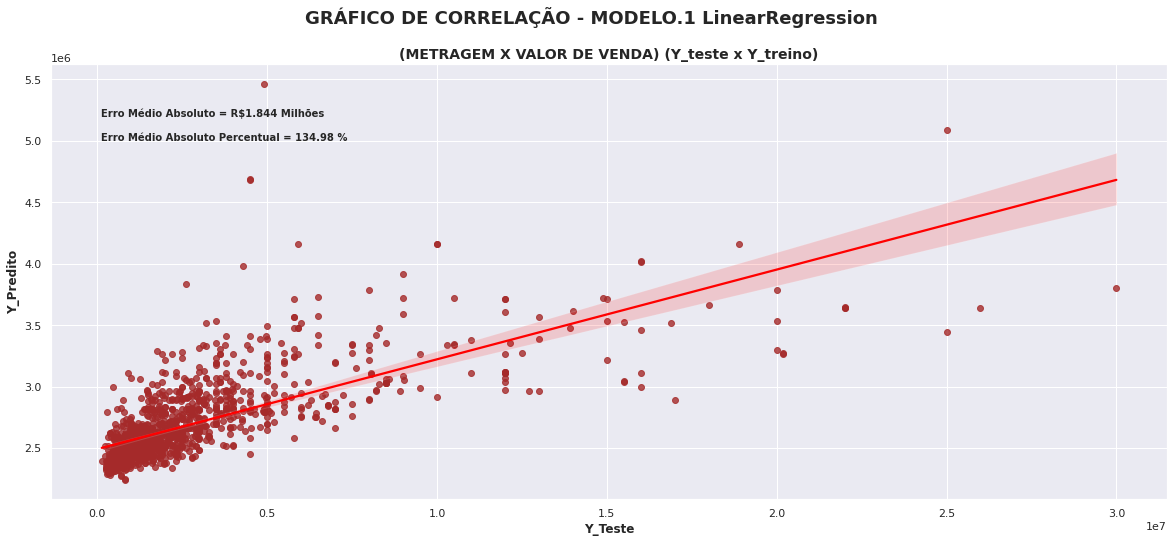

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x=Y_test1, y=Y_predict1, line_kws= {'color':'red'}, color= "brown");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.1 LinearRegression', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(100000, 5200000,'Erro Médio Absoluto = R${:.3f} Milhões'.format(mae1/1000000), fontsize = 10, fontweight ='semibold')
plt.text(100000, 5000000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape1*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2> Selecionando as melhores variáveis em "X" para predizer "Y" (Valor_anuncio), utilizando os métodos do scikit-learn:</h2>



*   [f_regression() ](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html): Modelo linear rápido para testar o efeito de um único regressor, sequencialmente para muitos regressores;
*   [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html): Seleciona as variáveis (k), de acordo com as  pontuações mais altas para predizer "Y".





In [ ]:
# Armazenando as Variáveis preditoras em X_1 e o Valor objetivo em Y_1
X_2 = dados_vendas_censo.drop(['Valor_anuncio',	'Valor_mm',	'Valor_m2', 'Rua', 'Bairro', 'Cidade'], axis= 1)
Y_2 = dados_vendas_censo['Valor_anuncio']

In [ ]:
#Verificando quantas linhas e colunas estão armazenadas em Y_1 e X_1
Y_2.shape, X_2.shape

((5308,), (5308, 19))

<h2> Treinando o Modelo e análizando a melhor combinação de Variáveis em X_1 para prever Y_1 "Valor_anuncio", com base no menor mae (<i>mean_absolute_erro</i>).</h2>

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.25, random_state = 42)

k_vs_score2 = []
score_list2 = []

for k in range(1, 19, 1):
  # Configurando todas as variáveis
  seletor_variaveis2 = SelectKBest(score_func=f_regression, k= k)

  # Realizando o fit das variáveis e os valores de imóveis Treino
  Xtreino2 = seletor_variaveis2.fit_transform(X_train_2, Y_train_2)
  Xteste2  = seletor_variaveis2.transform(X_test_2)

  modelo2 = LinearRegression()
  modelo2.fit(Xtreino2 , Y_train_2)

  Y_predict_selecionado2 = modelo2.predict(Xteste2) 

  score =  metrics.mean_absolute_error(Y_test_2, Y_predict_selecionado2)
  
  k_vs_score2.append(k)
  score_list2.append(score)


<h2> Plotando em um Gráfico de linha os Erros Médios Absolutos em relação a Qtd. de Variáveis utilizadas em X_2.</h2>

<i>Nota: Que com 11 variáveis o modelo alcança o melhor Resultado: MAE = R$ 1.422 milhões.</i> 

In [ ]:
px.line( x = k_vs_score2, y = score_list2, title= "Seleção de Variáveis - Qtd. Variáveis X Erro Médio Absoluto - LinearRegression",
        template = 'seaborn', markers="*")

<h2>Verificando quais variáveis apresentam o maior Nivel de Relevância em relação ao  valor predito.</h2>

In [ ]:

# Configurando todas as variáveis
fs = SelectKBest(score_func=f_regression, k= 'all')

# Realizando o fit entre X_train (Variaiveis do Data set) e Y_train (Valore_anuncio)
fs.fit(X_train_2, Y_train_2)

# Transformando os dados de X_train
X_train_fs = fs.transform(X_train_2)

# Transformando os dados de X_test
X_test_fs = fs.transform(X_test_2)

features = []
scores = []
# Armazenando a features e os scores em listas
for i in range(len(fs.scores_)):
	features.append(i), scores.append(fs.scores_[i])
 
# Armazenando os nomes das features na variável "variaveis", utilizando a função "get_feature_names_out()"
variaveis = fs.get_feature_names_out()
variaveis
 

array(['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'latitude',
       'longitude', 'Situacao_setor', 'V001', 'V002', 'V003', 'V004',
       'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype=object)

Elaborando um Data Frame com os dados de Scores e Variáveis:

In [ ]:
ranking_variaveis = pd.DataFrame(zip(variaveis, scores ),
                                 columns=["Variáveis", "Scores"])

ranking_variaveis.sort_values("Scores", ascending= False, inplace = True)

In [ ]:
px.bar(data_frame= ranking_variaveis, x = "Variáveis", y = "Scores", color = "Scores", title = "VARIÁVEIS X SCORE DE RELEVÂNCIA", template = "ggplot2" )

 <h2>Teste 2.  Incluindo as váriáveis que indicam uma maior correlação com a variável "Valor_anuncio".</h2>

In [ ]:

# Configurando todas as variáveis
seletor_variaveis = SelectKBest(score_func=f_regression, k= 11)

# Realizando o fit das variáveis e os valores de imóveis Treino
Xtreino_2 = seletor_variaveis.fit_transform(X_train_2, Y_train_2)
Xteste_2  = seletor_variaveis.transform(X_test_2)

modelo2 = LinearRegression()
modelo2.fit(Xtreino_2 , Y_train_2)

Y_predict2 = modelo2.predict(Xteste_2) 

mae2 = metrics.mean_absolute_error(Y_test_2, Y_predict2)
mape2 = metrics.mean_absolute_percentage_error(Y_test_2, Y_predict2)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae2/1000000, mape2*100))



Erro médio entre Y Teste e Y Predito de Teste: R$ 1.421 Milhões ou 71.39 % 


<h2> Resultados obtidos entre Teste 1 e Teste2:</h2>

*Note que houveram uma melhoria nos resultados em relação aos modelo anterior no quaul utilizado apenas 1 variável para X para predizer Y:*

Redução dos Erros em:  **0.423 Milhões de Reais** ou **63,59%**.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %.



Plotando um gráfico com os dados de teste e treino.

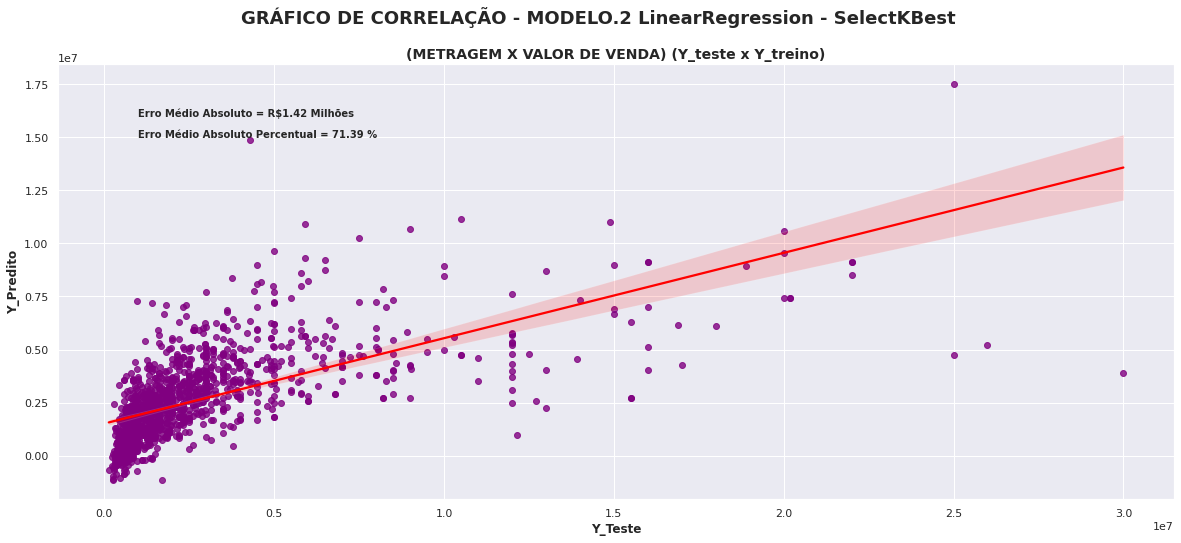

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x=Y_test_2, y=Y_predict2, line_kws= {'color':'red'}, color= 'purple');
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.2 LinearRegression - SelectKBest', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(1000000, 16000000,'Erro Médio Absoluto = R${:.2f} Milhões'.format(mae2/1000000), fontsize = 10, fontweight ='semibold')
plt.text(1000000, 15000000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape2*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2>Teste 3. Aplicando o método get_dumies do Pandas para converter os dados de bairros que são categóricos para dados numéricos, pois o Bairro pode ser uma variável importante na definição dos preços.</h2>

*   [Pandas get_dumies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) é uma transformação realizada nos dados para representarmos uma variável categórica de forma binária (indica presença ou ausência de um valor).
 

Armazenando os numéricos dos bairros em uma novo dataframe chamado 'dados_gd'.


In [ ]:
dados_gd = pd.get_dummies(dados_vendas_censo['Bairro'])

Note que novo Dataframe contem  valores 1 ou 0 onde indica se o imóvel entá localizado ou não no bairro de cada coluna.


In [ ]:
dados_gd.head()

,Aclimação,Alto da Boa Vista,Alto da Lapa,Alto da Mooca,Alto de Pinheiros,Balneário Mar Paulista,Barra Funda,Barro Branco (Zona Norte),Bela Aliança,Bela Vista,...,Vila das Belezas,Vila das Mercês,Vila do Bosque,Vila do Castelo,Vila do Encontro,Vila dos Remédios,Vila Água Funda,Água Branca,Água Fria,Água Rasa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Inserindo os dados do Dataframe "dados_gd" ao Dataframe e removendo os demais dados categóricos do dataframe "dados_vendas_censo".

In [ ]:
dados_vendas_censo_gd = dados_vendas_censo.drop(['Bairro', 'Rua', 'Cidade','Valor_mm','Valor_m2'], axis = 1)
dados_vendas_censo_gd = dados_vendas_censo_gd.join(dados_gd)
dados_vendas_censo_gd.head()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,latitude,longitude,Situacao_setor,V001,V002,...,Vila das Belezas,Vila das Mercês,Vila do Bosque,Vila do Castelo,Vila do Encontro,Vila dos Remédios,Vila Água Funda,Água Branca,Água Fria,Água Rasa
0,1000,4,8,6,7000000.00,-23.62,-46.65,1.00,164.00,437.00,...,0,0,0,0,0,0,0,0,0,0
1,496,4,4,4,3700000.00,-23.64,-46.69,1.00,136.00,425.00,...,0,0,0,0,0,0,0,0,0,0
2,125,4,3,2,380000.00,-23.75,-46.70,1.00,142.00,493.00,...,0,0,0,0,0,0,0,0,0,0
3,100,3,2,2,540000.00,-23.55,-46.59,1.00,156.00,468.00,...,0,0,0,0,0,0,0,0,0,0
4,440,4,4,6,1980000.00,-23.59,-46.76,1.00,107.00,376.00,...,0,0,0,0,0,0,0,0,0,0


Aplicando novamente o modelo de Regressão Linear ao novo Data Frame "dados_vendas_censo_on_hot".

In [ ]:
Y_3 = dados_vendas_censo_gd.Valor_anuncio

In [ ]:
X_3 = dados_vendas_censo_gd.drop('Valor_anuncio', axis =1)

In [ ]:
# Verificando a quantidade de variaveis armazenadas em X_3
X_3.shape, Y_3.shape

((5308, 597), (5308,))

In [ ]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size = 0.25, random_state = 42)

k_vs_score_3 = []
score_list_3 = []

for k in range(1, 597, 2):
  # Configurando todas as variáveis
  seletor_variaveis_3 = SelectKBest(score_func=f_regression, k= k)

  # Realizando o fit das variáveis e os valores de imóveis Treino
  Xtreino_3 = seletor_variaveis_3.fit_transform(X_train_3, Y_train_3)
  Xteste_3  = seletor_variaveis_3.transform(X_test_3)

  modelo3 = LinearRegression()
  modelo3.fit(Xtreino_3 , Y_train_3)

  Y_predict_3 = modelo3.predict(Xteste_3) 

  score_3 =  metrics.mean_absolute_error(Y_test_3, Y_predict_3)
  
  k_vs_score_3.append(k)
  score_list_3.append(score_3)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate

<h2> Plotando novamente o Gráfico de linha os Erros Médios Absolutos em relação a Qtd. de Variáveis utilizadas em X para o Data Frame dados_vendas_censo_on_hot.</h2>

<i>Nota: Que com 543 variáveis o modelo alcança o melhor Resultado: MAE = R$ 1.05 milhões.</i> 

In [ ]:
px.line( x = k_vs_score_3, y = score_list_3, title= "Seleção de Variáveis - Qtd. Variáveis X Erro Médio Absoluto (get_dummies) - LinearRegression",
        template = 'seaborn', markers = "o")

In [ ]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size = 0.25, random_state = 42)


# Configurando todas as variáveis
seletor_variaveis_3 = SelectKBest(score_func=f_regression, k= 543)

# Realizando o fit das variáveis e os valores de imóveis Treino
Xtreino_3 = seletor_variaveis_3.fit_transform(X_train_3, Y_train_3)
Xteste_3  = seletor_variaveis_3.transform(X_test_3)

modelo3 = LinearRegression()
modelo3.fit(Xtreino_3 , Y_train_3)

Y_predict_3 = modelo3.predict(Xteste_3) 

mae3 = metrics.mean_absolute_error(Y_test_3, Y_predict_3)
mape3 = metrics.mean_absolute_percentage_error(Y_test_3, Y_predict_3)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae3/1000000, mape3*100))



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide



Erro médio entre Y Teste e Y Predito de Teste: R$ 1.052 Milhões ou 56.56 % 


<h2> Resultados obtidos entre Teste 1 e Teste 3:</h2>

*Para o Teste 3, ao aplicar o método get_dummines houve mais uma redução do erro absoluto médio conforme abaixo :*

Redução dos Erros em:  **0.792 Milhões de Reais** ou **78.42%** em relação aos Testes 1 e 3.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %.



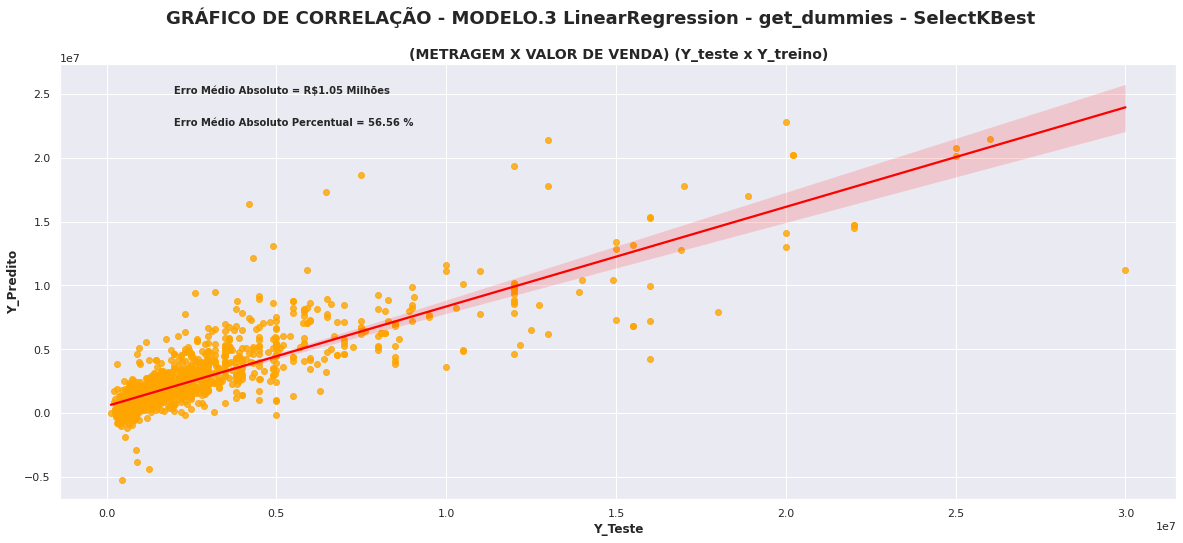

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x=Y_test_3, y=Y_predict_3, line_kws= {'color':'red'}, color= 'orange');
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.3 LinearRegression - get_dummies - SelectKBest', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(2000000, 25000000,'Erro Médio Absoluto = R${:.2f} Milhões'.format(mae3/1000000), fontsize = 10, fontweight ='semibold')
plt.text(2000000, 22500000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape3*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2>Teste 4. Aplicando um modelo de predição com o Método Random Forest Regressor.</h2>

"O nome Random Forest faz todo o sentido quando se pensa em seu funcionamento: random significa aleatório, e denota o comportamento do algoritmo ao selecionar subconjuntos de features e montar mini árvores de decisão. Forest significa floresta, já que são geradas várias árvores de decisão.

<b>Por que Random Forest é tão famoso e amplamente adotado?</b>

*  Por ter suas origens na forma mais básica e inicial de um algoritmo de suporte a decisão (as árvores de decisão), fica muito fácil entender seu funcionamento;
*  Resolvem problemas tanto de regressão (ex.: prever valor de uma casa) quanto de classificação (e-mail é spam ou não é spam);
*  Apresenta bons resultados em diversos tipos de problemas;
*  Possui implementações nas mais diversas bibliotecas de inteligência artificial disponíveis atualmente."

Trechos extraidos do Artigo ["Random Forest: como funciona um dos algoritmos mais populares de ML"](https://medium.com/cinthiabpessanha/random-forest-como-funciona-um-dos-algoritmos-mais-populares-de-ml-cc1b8a58b3b4) da autora **Cínthia Pessanha**. 

In [ ]:
# Importando o método RadomForestRegressor da biblioteca sklearn
from sklearn.ensemble import RandomForestRegressor

Treinando o modelo com os mesmos dados aplicados no primeiro teste no qual foram utilizados somente dos dados de "Metragem" para predizer os dados de "Valor_anuncio".

In [ ]:

modelo4 = RandomForestRegressor( )
modelo4.fit(X_train1, Y_train1)
Y_predict_4 = modelo4.predict(X_test1)

# Análisando os erros do modelo
mae4  = metrics.mean_absolute_error(Y_test1, Y_predict_4)
mape4 = metrics.mean_absolute_percentage_error(Y_test1, Y_predict_4)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae4/1000000, mape4*100))


Erro médio entre Y Teste e Y Predito de Teste: R$ 1.202 Milhões ou 54.90 % 


<h2> Resultados obtidos entre Teste 1 e Teste 4:</h2>

*Ao aplicar o modelo RandomForestRegression somente os dados de "Metragem" em X para predizer Y houve uma melhoria no resultado:*

Redução dos Erros em:  **0.646 Milhões de Reais** ou **80.46%**.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %;
*  Resultado Teste 4: Erro Absoluto Médio 1.198 Milhões de Reais ou 54.52 %.



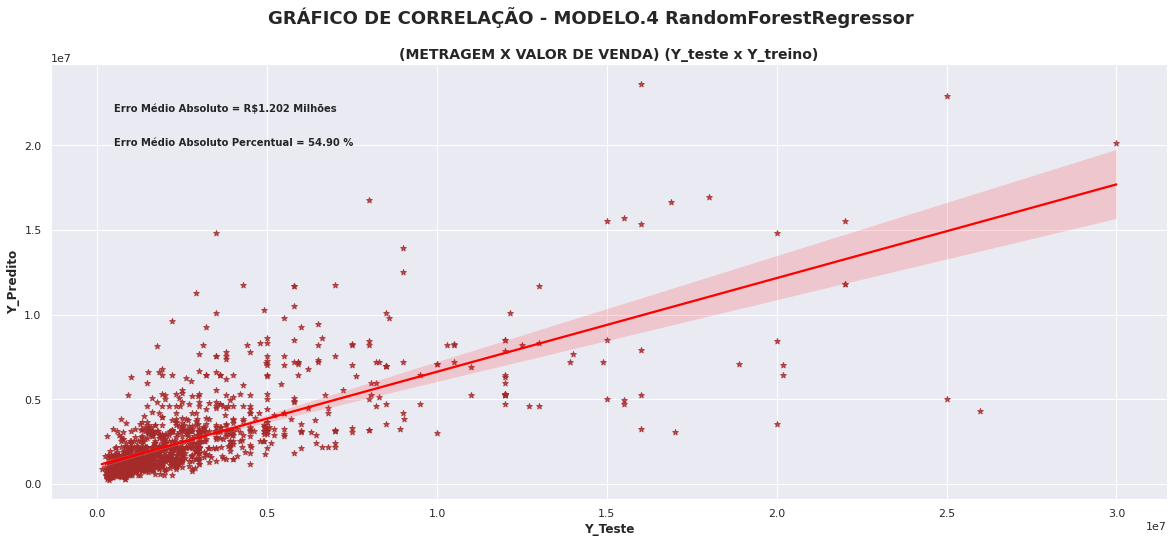

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x=Y_test1, y=Y_predict_4, line_kws= {'color':'red'}, color = "brown", marker= "*");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.4 RandomForestRegressor', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(500000, 22000000,'Erro Médio Absoluto = R${:.3f} Milhões'.format(mae4/1000000), fontsize = 10, fontweight ='semibold')
plt.text(500000, 20000000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape4*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2> Teste 5. Fazendo uma nova seleção das melhores variáveis para aplicar ao modelo de <i>Random Forest Regressor</i>.</h2>

In [ ]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size = 0.25, random_state = 42)

k_vs_score_5 = []
score_list_5 = []

for k in range(1, 19, 1):
  # Configurando todas as variáveis
  seletor_variaveis_5 = SelectKBest(score_func=f_regression, k= k)

  # Realizando o fit das variáveis e os valores de imóveis Treino
  Xtreino_5 = seletor_variaveis_5.fit_transform(X_train_2, Y_train_2)
  Xteste_5  = seletor_variaveis_5.transform(X_test_2)

  modelo5 = RandomForestRegressor( )
  modelo5.fit(Xtreino_5 , Y_train_2)

  Y_predict_5 = modelo5.predict(Xteste_5) 

  score_5 =  metrics.mean_absolute_error(Y_test_2, Y_predict_5)
  
  k_vs_score_5.append(k)
  score_list_5.append(score_5)


<h2> Plotando em um Gráfico de linha os Erros Médios Absolutos em relação a Qtd. de Variáveis utilizadas em X para o Modelo <i>Random Forest Regression</i>.</h2>

<i>Nota: Que com 12 variáveis o modelo alcança o melhor Resultado: MAE = R$ 0.612 milhões.</i> 

In [ ]:
px.line( x = k_vs_score_5, y = score_list_5, title= "Seleção de Variáveis - Qtd. Variáveis X Erro Médio Absoluto - Random Forest Regression",
        template = 'plotly', markers="o")

<h2> Aplicando as 14 melhores variáveis ao modelo <i>Random Forest Regression</i>.</h2>

In [ ]:

# Configurando todas as variáveis
seletor_variaveis_5 = SelectKBest(score_func=f_regression, k= 12)

# Realizando o fit das variáveis e os valores de imóveis Treino
Xtreino_5 = seletor_variaveis_5.fit_transform(X_train_2, Y_train_2)
Xteste_5  = seletor_variaveis_5.transform(X_test_2)

modelo5 = RandomForestRegressor( )
modelo5.fit(Xtreino_5 , Y_train_2)

Y_predict_5 = modelo5.predict(Xteste_5) 

mae5  = metrics.mean_absolute_error(Y_test_2, Y_predict_5)
mape5 = metrics.mean_absolute_percentage_error(Y_test_2, Y_predict_5)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae5/1000000, mape5*100))


Erro médio entre Y Teste e Y Predito de Teste: R$ 0.620 Milhões ou 27.06 % 


<h2> Resultados obtidos entre Teste 1 e Teste 5:</h2>

*Para o Teste 5, aplicando o método de seleção de variáries ao random forest regression os erros entre valores reais e preditos reduziram conforme abaixo:*

Redução dos Erros em:  **1.234 Milhões de Reais** ou **108,32%** em relação aos Testes 1 e 5, porém o resultado foi inferior ao teste 4:

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %;
*  Resultado Teste 4: Erro Absoluto Médio 1.198 Milhões de Reais ou 54.52 %;
*  Resultado Teste 5: Erro Absoluto Médio 0.610 Milhões de Reais ou 26.66 %.



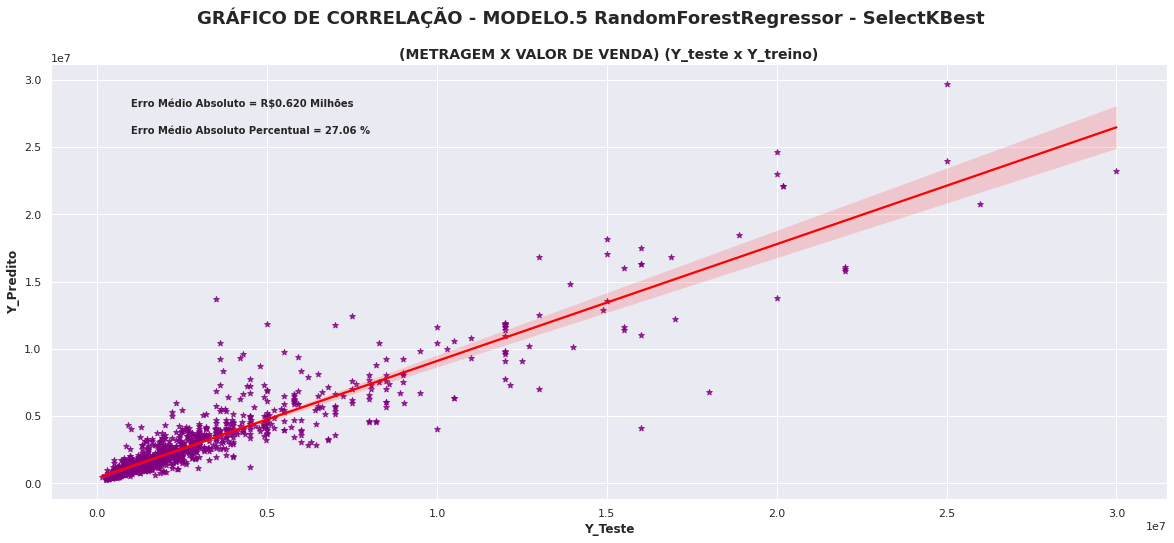

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x= Y_test_2, y= Y_predict_5, line_kws= {'color':'red'}, color= 'purple', marker= "*");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.5 RandomForestRegressor - SelectKBest', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(1000000, 28000000,'Erro Médio Absoluto = R${:.3f} Milhões'.format(mae5/1000000), fontsize = 10, fontweight ='semibold')
plt.text(1000000, 26000000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape5*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2> Teste 6. Fazendo uma nova seleção das melhrores varias para aplicar ao modelo de <i>Random Forest Regression</i> para o Data Frame <i>dados_vendas_censo_gd</i>.</h2>

In [ ]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size = 0.25, random_state = 42)

k_vs_score_6 = []
score_list_6 = []

for k in range(1, 597, 3):
  # Configurando todas as variáveis
  seletor_variaveis_6 = SelectKBest(score_func=f_regression, k= k)

  # Realizando o fit das variáveis e os valores de imóveis Treino
  Xtreino_6 = seletor_variaveis_6.fit_transform(X_train_3, Y_train_3)
  Xteste_6  = seletor_variaveis_6.transform(X_test_3)

  modelo6 = RandomForestRegressor( )
  modelo6.fit(Xtreino_6 , Y_train_3)

  Y_predict_6 = modelo6.predict(Xteste_6) 

  score_6 =  metrics.mean_absolute_error(Y_test_3, Y_predict_6)
  
  k_vs_score_6.append(k)
  score_list_6.append(score_6)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate

<h2> Plotando em um Gráfico de linha os Erros Médios Absolutos em relação a Qtd. de Variáveis utilizadas em X para o Modelo <i>Random Forest Regressor</i> ao Data Frame <i>dados_vendas_censo_gd</i>.</h2>

<i>Nota: Que com 436 variáveis o modelo alcança o melhor Resultado: MAE = R$ 0.573 milhões.</i> 

In [ ]:
px.line( x = k_vs_score_6, y = score_list_6,
        title= "Seleção de Variáveis - Qtd. Variáveis X Erro Médio Absoluto - Random Forest Regression & get_dummies",
        template = 'ggplot2', markers= "*")

<h2> Aplicando as 436 melhores variáveis ao modelo <i>Random Forest Regressor</i>.</h2>

In [ ]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size = 0.25, random_state = 42)

# Configurando todas as variáveis
seletor_variaveis_6 = SelectKBest(score_func=f_regression, k= 436)

# Realizando o fit das variáveis e os valores de imóveis Treino
Xtreino_6 = seletor_variaveis_6.fit_transform(X_train_3, Y_train_3)
Xteste_6  = seletor_variaveis_6.transform(X_test_3)

modelo6 = RandomForestRegressor( )
modelo6.fit(Xtreino_6 , Y_train_3)

Y_predict_6 = modelo6.predict(Xteste_6) 

mae6 = metrics.mean_absolute_error(Y_test_3, Y_predict_6)
mape6 = metrics.mean_absolute_percentage_error(Y_test_3, Y_predict_6)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae6/1000000, mape6*100))


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning:

invalid value encountered in true_divide



Erro médio entre Y Teste e Y Predito de Teste: R$ 0.583 Milhões ou 24.54 % 


<h2> Resultados obtidos entre Teste 1 e Teste 6:</h2>

*Para o Teste 6, aplicando em conjunto os métodos get_dammiens, SelectKBest e Random Forest Regression houve uma pequena melhora em relação aos testes anteriores:*

Redução dos Erros em:  **1.264 Milhões de Reais** ou **110.28 %** em relação aos Testes 1 e 6.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %;
*  Resultado Teste 4: Erro Absoluto Médio 1.198 Milhões de Reais ou 54.52 %;
*  Resultado Teste 5: Erro Absoluto Médio 0.610 Milhões de Reais ou 26.66 %;
*  Resultado Teste 6: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.70 %.



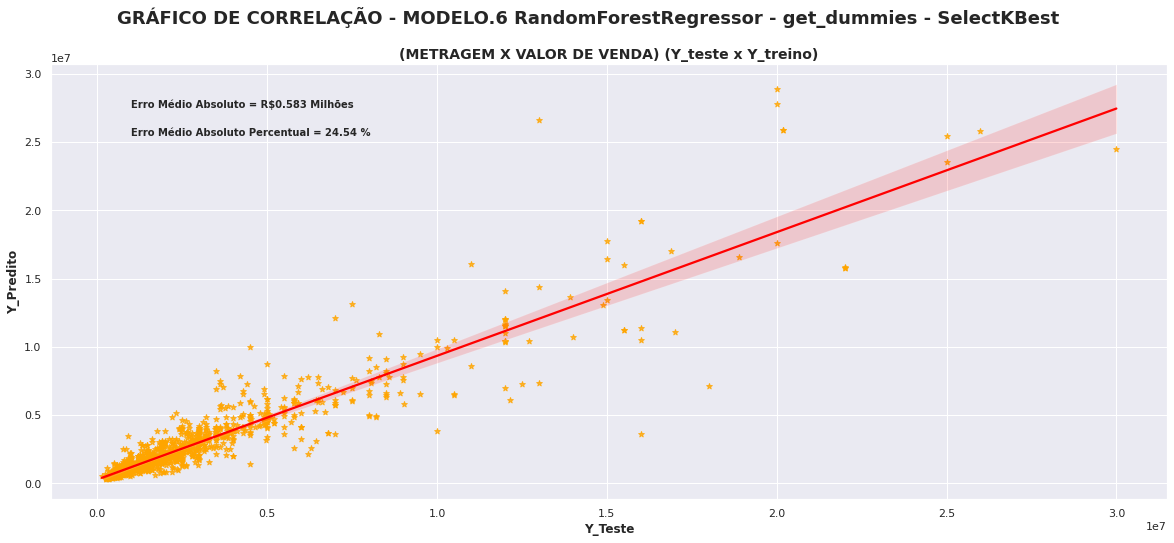

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x=Y_test_3, y=Y_predict_6, line_kws= {'color':'red'}, color= 'orange', marker= "*");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.6 RandomForestRegressor - get_dummies - SelectKBest ', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(1000000, 27500000,'Erro Médio Absoluto = R${:.3f} Milhões'.format(mae6/1000000), fontsize = 10, fontweight ='semibold')
plt.text(1000000, 25500000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape6*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2> Teste 7. Aplicando  Random Forest Regressiona todas as Variáveis de X_3 e Data Frame com One_Hot. </h2>

In [ ]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size = 0.25, random_state = 42)


modelo7 = RandomForestRegressor()


modelo7.fit(X_train_3 , Y_train_3)

Y_predict_7 = modelo7.predict(X_test_3) 

mae7 = metrics.mean_absolute_error(Y_test_3, Y_predict_7)
mape7 = metrics.mean_absolute_percentage_error(Y_test_3, Y_predict_7)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae7/1000000, mape7*100))


Erro médio entre Y Teste e Y Predito de Teste: R$ 0.576 Milhões ou 24.03 % 


<h2> Resultados obtidos entre Teste 1 e Teste 7:</h2>

*Para o Teste 7, aplicando em conjunto os métodos one_hot, Seleção de Variáveis e Random Forest Regression houve uma pequena melhora em relação aos testes anteriores:*

Redução dos Erros em:  **1.22 Milhões de Reais** ou **110.97 %** em relação aos Testes 1 e 7.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %;
*  Resultado Teste 4: Erro Absoluto Médio 1.198 Milhões de Reais ou 54.52 %;
*  Resultado Teste 5: Erro Absoluto Médio 0.610 Milhões de Reais ou 26.66 %;
*  Resultado Teste 6: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.70 %;
*  Resultado Teste 7: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.01 %.



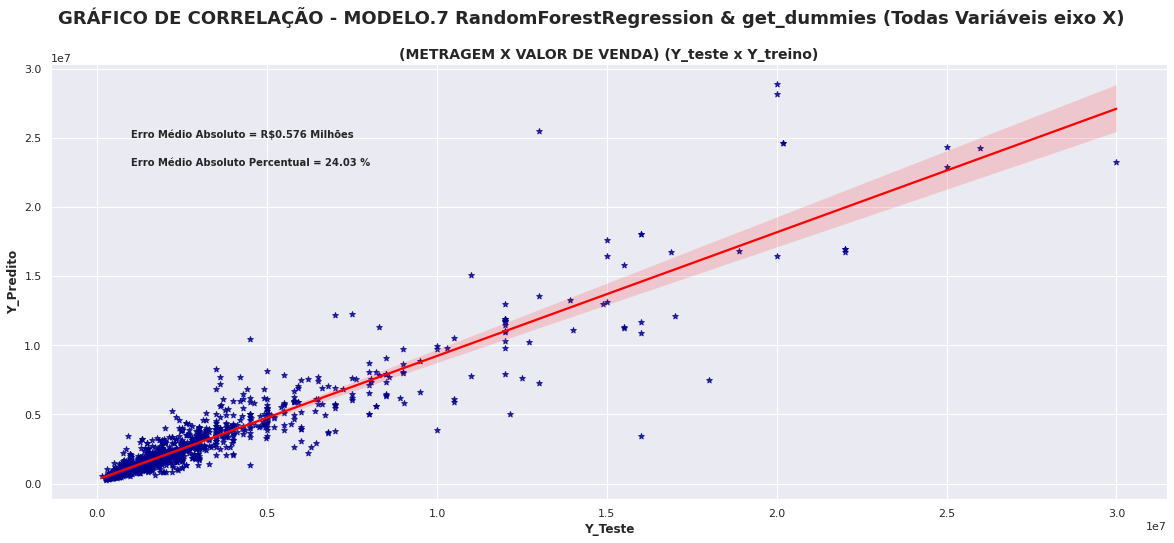

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x=Y_test_3, y= Y_predict_7, line_kws= {'color':'red'}, color= 'darkblue', marker= "*");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.7 RandomForestRegression & get_dummies (Todas Variáveis eixo X)', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(1000000, 25000000,'Erro Médio Absoluto = R${:.3f} Milhões'.format(mae7/1000000), fontsize = 10, fontweight ='semibold')
plt.text(1000000, 23000000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape7*100), fontsize = 10,fontweight ='semibold')

plt.show()

<h2> Teste 8. Aplicando  Random Forest Regressiona todas as Variáveis de X_3 e Data Frame com One_Hot para "Y" Valor_anuncio <= R$ 10 Milhões. </h2>

Filtrando Data Frame para Valores  <= 10.000.000.

In [ ]:
dados_vendas_10M = dados_vendas_censo_gd[dados_vendas_censo_gd["Valor_anuncio"] <= 10000000]
dados_vendas_10M.shape

(5131, 598)

In [ ]:
Y_M10 = dados_vendas_10M.Valor_anuncio
X_M10 = dados_vendas_10M.drop('Valor_anuncio', axis =1)

X_M10.shape, Y_M10.shape

((5131, 597), (5131,))

Treinando novamente o modelo de Random Forest Regression utilizando todas a variáveis do eixo "X".

In [ ]:
X_train_M10, X_test_M10, Y_train_M10, Y_test_M10 = train_test_split(X_M10, Y_M10, test_size = 0.25, random_state = 42)


modelo8 = RandomForestRegressor()


modelo8.fit(X_train_M10 , Y_train_M10)

Y_predict_8 = modelo8.predict(X_test_M10) 

mae8 =  metrics.mean_absolute_error(Y_test_M10, Y_predict_8)
mape8 = metrics.mean_absolute_percentage_error(Y_test_M10, Y_predict_8)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae8/1000000, mape8*100))


Erro médio entre Y Teste e Y Predito de Teste: R$ 0.440 Milhões ou 23.26 % 


<h2> Resultados obtidos entre Teste 1 e Teste 8:</h2>

*Para o Teste 7, mesmo ao aplicar o modelo Random Forest aos dados filtrados para valor Y <= 10 Milhões o resultado de Erro Percentual Médio não reduziu consideravelmente:*

Redução dos Erros em:  **1.404 Milhões de Reais** ou **111.66 %** em relação aos Testes 1 e 8.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %;
*  Resultado Teste 4: Erro Absoluto Médio 1.198 Milhões de Reais ou 54.52 %;
*  Resultado Teste 5: Erro Absoluto Médio 0.610 Milhões de Reais ou 26.66 %;
*  Resultado Teste 6: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.70 %;
*  Resultado Teste 7: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.01 %;
*  Resultado Teste 8: Erro Absoluto Médio 0.440 Milhões de Reais ou 23.32 %.



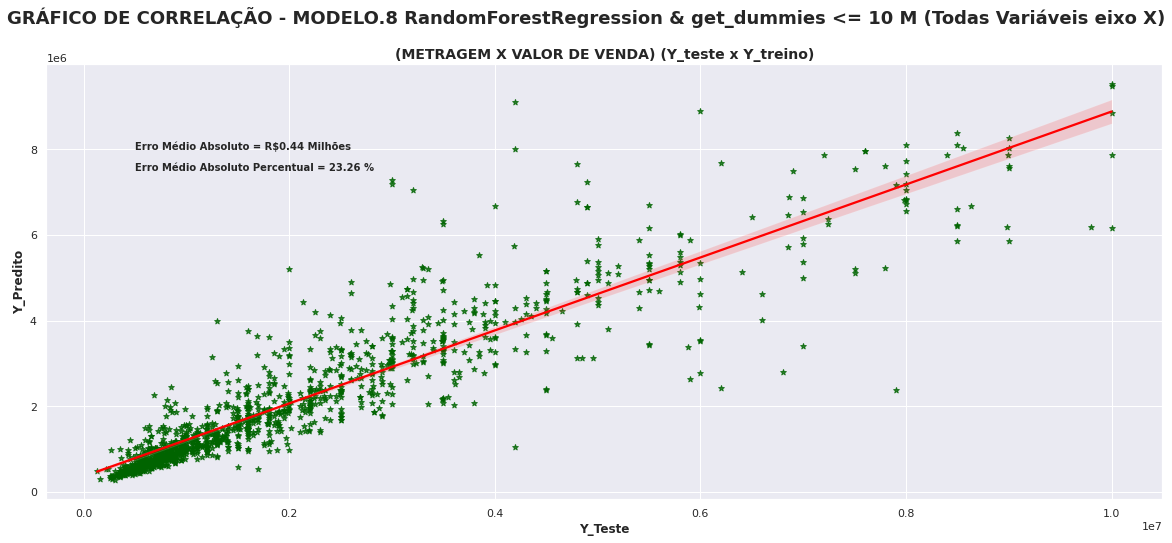

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x= Y_test_M10, y= Y_predict_8, line_kws= {'color':'red'}, color= 'darkgreen', marker= "*");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.8 RandomForestRegression & get_dummies <= 10 M (Todas Variáveis eixo X)', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.text(500000, 8000000,'Erro Médio Absoluto = R${:.2f} Milhões'.format(mae8/1000000), fontsize = 10, fontweight ='semibold')
plt.text(500000, 7500000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape8*100), fontsize = 10,fontweight ='semibold')
 
plt.show()

<h2> Teste 9. Aplicando  Random Forest Regressiona todas as Variáveis de X_3 e Data Frame com One_Hot para "Y" Valor_anuncio <= R$ 1 Milhão. </h2>

In [ ]:
dados_vendas_1M = dados_vendas_censo_gd[dados_vendas_censo_gd["Valor_anuncio"] <= 1000000]
dados_vendas_1M.shape

(1723, 598)

In [ ]:
Y_M1 = dados_vendas_1M.Valor_anuncio
X_M1 = dados_vendas_1M.drop('Valor_anuncio', axis =1)

X_M1.shape, Y_M1.shape

((1723, 597), (1723,))

In [ ]:
X_train_M1, X_test_M1, Y_train_M1, Y_test_M1 = train_test_split(X_M1, Y_M1, test_size = 0.25, random_state = 42)



modelo9 = LinearRegression( )
modelo9.fit(X_train_M1 , Y_train_M1)

  
Y_predict_9 = modelo9.predict(X_test_M1) 

mae9  = metrics.mean_absolute_error(Y_test_M1, Y_predict_9)
mape9 = metrics.mean_absolute_percentage_error(Y_test_M1, Y_predict_9)

print("Erro médio entre Y Teste e Y Predito de Teste: R$ {:.3f} Milhões ou {:.2f} % ".format(mae9/1000000, mape9*100))

Erro médio entre Y Teste e Y Predito de Teste: R$ 0.093 Milhões ou 29.99 % 


<h2> Resultados obtidos entre Teste 1 e Teste 9:</h2>

*Para o Teste 9, mesmo ao aplicar o modelo Random Forest aos dados filtrados para valor Y <= 1 Milhão o resultado de Erro Percentual Médio aumentou em relação aos testes (de 4 a 9):*

Redução dos Erros em:  **1.751 Milhões de Reais** ou **104.99 %** em relação aos Testes 1 e 8.

*  Resultado Teste 1: Erro Absoluto Médio 1.844 Milhões de Reais ou 134.98 %;
*  Resultado Teste 2: Erro Absoluto Médio 1.421 Milhões de Reais ou 71.39 %;
*  Resultado Teste 3: Erro Absoluto Médio 1.052 Milhões de Reais ou 56.56 %;
*  Resultado Teste 4: Erro Absoluto Médio 1.198 Milhões de Reais ou 54.52 %;
*  Resultado Teste 5: Erro Absoluto Médio 0.610 Milhões de Reais ou 26.66 %;
*  Resultado Teste 6: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.70 %;
*  Resultado Teste 7: Erro Absoluto Médio 0.580 Milhões de Reais ou 24.01 %;
*  Resultado Teste 8: Erro Absoluto Médio 0.440 Milhões de Reais ou 23.32 %;
*  Resultado Teste 9: Erro Absoluto Médio 0.093 Milhões de Reais ou 29.99 %.

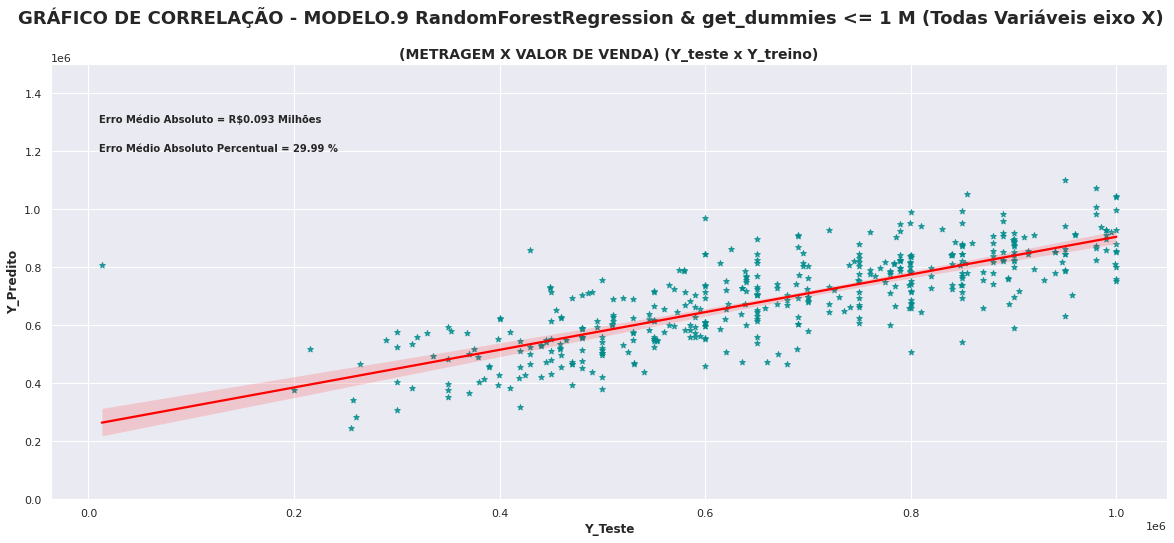

In [ ]:
plt.figure(figsize=(20, 8))
sns.regplot( x= Y_test_M1, y= Y_predict_9, line_kws= {'color':'red'}, color= 'darkcyan', marker= "*");
plt.suptitle('GRÁFICO DE CORRELAÇÃO - MODELO.9 RandomForestRegression & get_dummies <= 1 M (Todas Variáveis eixo X)', fontsize = 18, fontweight ='bold');
plt.title('(METRAGEM X VALOR DE VENDA) (Y_teste x Y_treino)', fontsize = 14, fontweight ='semibold')
plt.xlabel('Y_Teste', fontsize = 12, fontweight ='semibold')
plt.ylabel('Y_Predito', fontsize = 12, fontweight ='semibold')
plt.ylim(0, 1500000)
plt.text(10000, 1300000,'Erro Médio Absoluto = R${:.3f} Milhões'.format(mae9/1000000), fontsize = 10, fontweight ='semibold')
plt.text(10000, 1200000,'Erro Médio Absoluto Percentual = {:.2f} % '.format(mape9*100), fontsize = 10,fontweight ='semibold')
 
plt.show()

In [ ]:


modelos = [modelo1, modelo2, modelo3,modelo4, modelo5, modelo6, modelo7, modelo8, modelo9]

metodos = ["LinearRegression X = Metragem ", "LinearRegression X = BestKSelect ", "LinearRegression X = BestKSelect & get_dummies",
           "RandomForestRegressor X = Metragem ", "RandomForestRegressor X = BestKSelect  ",
           "RandomForestRegressor X = BestKSelect & get_dummies ", "RandomForestRegressor X = Todos - get_dummies ",
           "RandomForestRegressor X = BestKSelect & get_dummies Y <= 10M", "RandomForestRegressor X = BestKSelect & get_dummies Y <= 1M "]

resultados_mae = ['R$ {:.3f} Mi'.format(mae1/1000000),'R$ {:.3f} Mi'.format(mae2/1000000),'R$ {:.3f} Mi'.format(mae3/1000000),'R$ {:.3f} Mi'.format(mae4/1000000),
                  'R$ {:.3f} Mi'.format(mae5/1000000),'R$ {:.3f} Mi'.format(mae6/1000000),'R$ {:.3f} Mi'.format(mae7/1000000),'R$ {:.3f} Mi'.format(mae8/1000000),
                  'R$ {:.3f} Mi'.format(mae9/1000000)]

resultados_mape = [mape1*100, mape2*100, mape3*100, mape4*100, mape5*100, mape6*100, mape7*100, mape8*100, mape9*100]

resultados_testes = pd.DataFrame(zip(modelos, metodos, resultados_mae, resultados_mape ),
                                 columns=["Modelos", "Metodos", "MAE", "MAPE"])


resultados_testes.sort_values("MAPE",  ascending= False, inplace = True)

resultados_testes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 7
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Modelos  9 non-null      object 
 1   Metodos  9 non-null      object 
 2   MAE      9 non-null      object 
 3   MAPE     9 non-null      float64
dtypes: float64(1), object(3)
memory usage: 360.0+ bytes


In [ ]:
resultados_testes

,Modelos,Metodos,MAE,MAPE
0,LinearRegression(),LinearRegression X = Metragem,R$ 1.844 Mi,134.98
1,LinearRegression(),LinearRegression X = BestKSelect,R$ 1.421 Mi,71.39
2,LinearRegression(),LinearRegression X = BestKSelect & get_dummies,R$ 1.052 Mi,56.56
3,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor X = Metragem,R$ 1.202 Mi,54.90
8,LinearRegression(),RandomForestRegressor X = BestKSelect & get_du...,R$ 0.093 Mi,29.99
4,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor X = BestKSelect,R$ 0.620 Mi,27.06
5,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor X = BestKSelect & get_du...,R$ 0.583 Mi,24.54
6,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor X = Todos - get_dummies,R$ 0.576 Mi,24.03
7,"(DecisionTreeRegressor(max_features='auto', ra...",RandomForestRegressor X = BestKSelect & get_du...,R$ 0.440 Mi,23.26


In [ ]:
fig = px.bar(data_frame = resultados_testes, x = "MAPE", y = "Metodos" ,  template = "seaborn", text_auto=True, 
       title = "Modelos x MAPE - Mean Absolute Percentage Error ", hover_data=['MAE', 'MAPE'], orientation='h')
fig.update_xaxes(showticklabels=False, zeroline= True)
#fig.update_yaxes(showticklabels=False)

fig.show()

# CONCLUSÃO:

1.  **Análises de dados**: Nesse notebook foram explorados deversos métodos para elaborar, formatar e análisar dados por meio de algoritimos estásticos e de visualizações de dados, corforme o proposto no projeto de **Imersão Dados 4**;

2.  **Machine Learning**: Ao executar os 9 modelos de Machine Learning os melhores resultados foram:


*  **Modelo 7**: *RandomForestRegressor X = Todos - get_dummies* com MAE =R$ 0.584 Mi e MAPE=	24.10 %;

*  **Modelo 8**:	**RandomForestRegressor X = BestKSelect & get_dummies Y <= 10M** com MAE = R$0.441 Mi e MAPE = 23.63 %.

Mesmo com os resutados dos Modelos 7 e 8, os imdices de MAE e MAPE não são aceitáveis para a realização do *deploy*, sendo assim ainda demanda de mais pesquisar para a redução dos Erros MAE & MAPE.



